In [65]:
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

timeout = 10
connection = pymysql.connect(
      charset="utf8mb4",
      connect_timeout=timeout,
      cursorclass=pymysql.cursors.DictCursor,
      db="WEATHER-AIR-POLLUTION",
      host="mysql-3cafd5ec-weather-air-pollution.e.aivencloud.com",
      password="*************************",
      read_timeout=timeout,
      port=24379,
      user="avnadmin",
      write_timeout=timeout
)
cur = connection.cursor()
cur.execute("""SELECT * FROM Weather_Air_Cleaned""")
df = pd.DataFrame(cur.fetchall())
df["date_time"] = pd.to_datetime(df["date_time"])
cur.close()
connection.close()
df


,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.0000,8.0,4.0,2.0
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0000,9.0,4.0,4.0
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0000,17.0,4.0,10.0
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0000,23.0,4.0,11.0
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0000,20.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.0245,19.0,38.0,3.0
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.0453,19.0,39.0,3.0
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.0227,19.0,39.0,3.0
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.0227,19.0,37.0,3.0


In [66]:

df.describe()


,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
count,1728,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2022-05-13 12:00:00,7.433079,9.166030,25.028704,9.223542,29.823044,80.009838,36.372704,20.649026,51.346262,10.600116,13.186921,3.219956
min,2020-01-01 00:00:00,0.000000,1.000000,11.200000,2.390000,29.410000,36.000000,0.874000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,2021-03-07 18:00:00,0.000000,8.700000,21.500000,6.690000,29.660000,73.000000,17.000000,11.000000,19.000000,10.000000,8.000000,2.000000
50%,2022-05-13 12:00:00,0.735000,9.800000,25.600000,8.180000,29.800000,83.000000,28.000000,17.000000,26.000000,11.000000,13.000000,3.000000
75%,2023-07-19 06:00:00,5.025000,10.000000,28.800000,10.762500,29.970000,88.000000,46.000000,27.000000,39.000000,15.000000,13.000000,4.000000
max,2024-09-23 00:00:00,506.710000,10.000000,35.400000,32.930000,30.350000,97.000000,272.688000,391.552000,500.000000,23.000000,48.000000,29.000000
std,NaN,24.328345,1.246316,4.647078,3.707362,0.187886,10.125982,27.204867,16.506355,88.280233,5.074927,8.286860,2.348592


## 1. DATA DISTRIBUTION

### 1.1 TOTAL

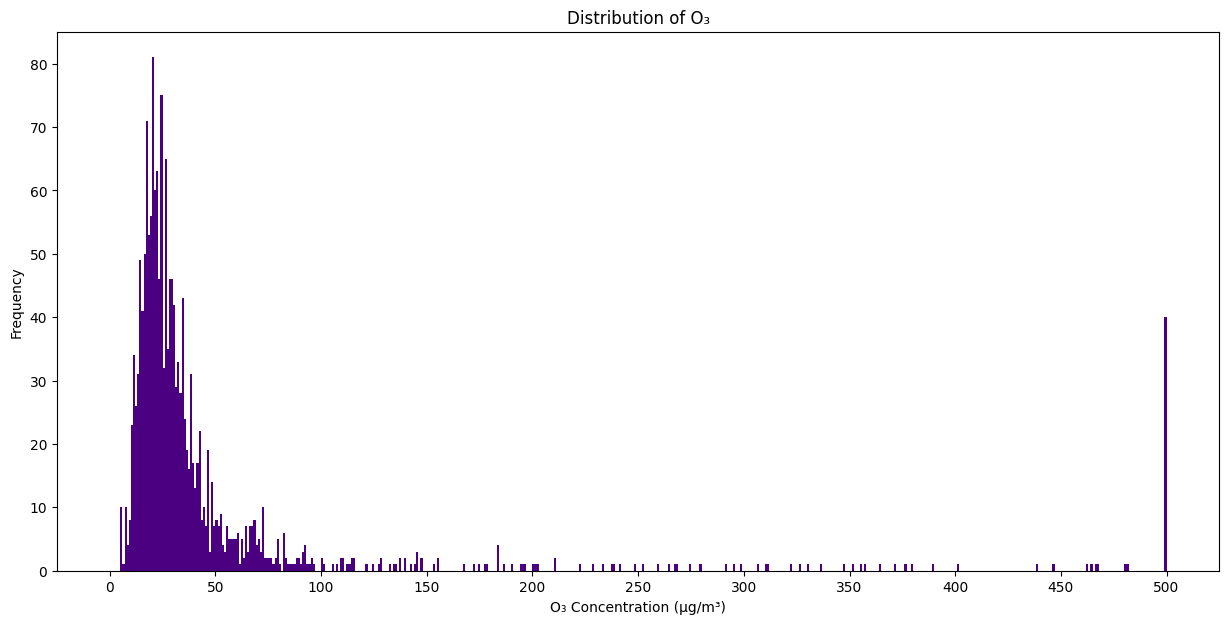

In [53]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%m/%d/%Y')
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

x_ticks = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]


# Tạo biểu đồ histogram cho phân phối của O3
plt.figure(figsize=(15, 7))
bins = np.arange(0, df['o3'].max() + 1, 1)
plt.hist(data=df, x='o3', bins=bins, color='indigo')
plt.xticks(x_ticks)
plt.title('Distribution of O₃')
plt.xlabel('O₃ Concentration (μg/m³)')
plt.ylabel('Frequency')
plt.show()


Observation: The O₃ index in the GOOD zone (0-50) accounts for a proportion many times larger than the moderate zone(>51).

### 1.2 SEASON

<Figure size 1500x700 with 0 Axes>

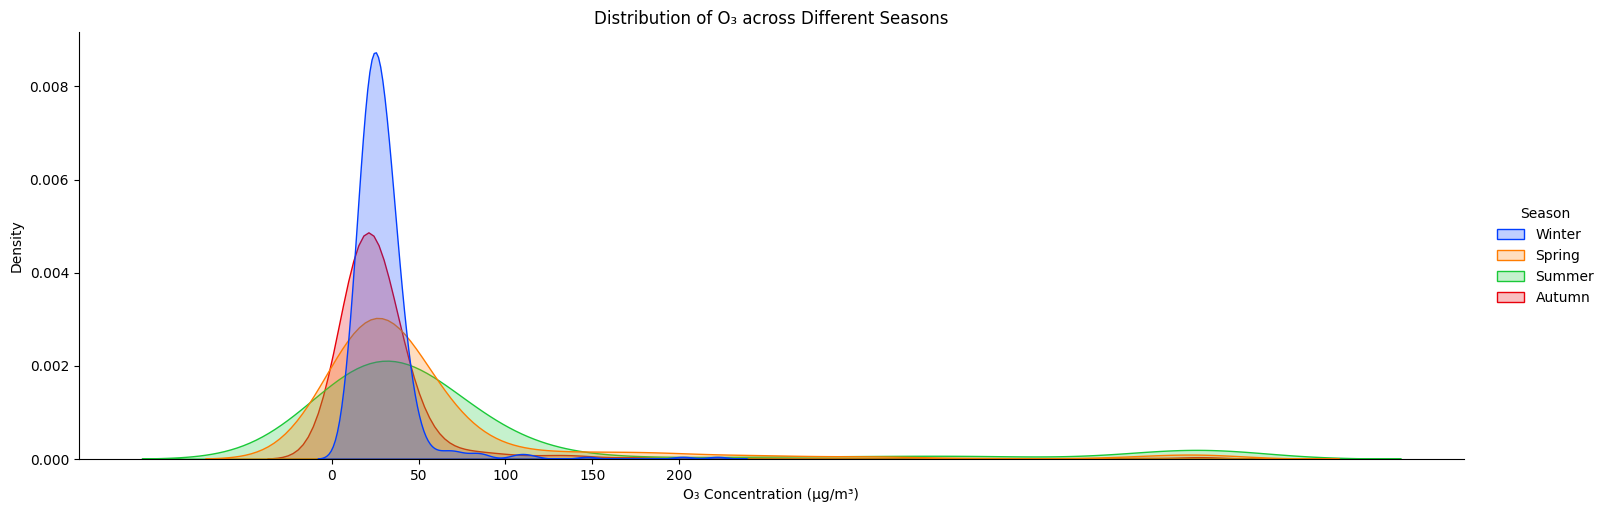

In [54]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['month'].apply(get_season)

# Set the ticks on the x-axis from 0 to 1000 at 50 intervals
x_ticks = [0, 50, 100, 150, 200]

# Plotting seasonal O3 distribution with KDE plot
plt.figure(figsize=(15, 7))
sns.displot(data=df, x='o3', hue='Season', kind='kde', fill=True,
            palette=sns.color_palette('bright')[:4], height=5, aspect=3)
plt.xticks(x_ticks)
plt.title('Distribution of O₃ across Different Seasons')
plt.xlabel('O₃ Concentration (μg/m³)')
plt.show()

Observation: The data are mainly distributed from 0-50 with high density across the seasons. Winter and autumn O₃ is mainly concentrated around low values ​​(0 < O₃ < 50). Summer and spring O₃ tends to increase (increasing O₃ density > 50) especially in summer.

## 2. AQI GRAPH VISUALIZATION

### 2.1 OVERTIME

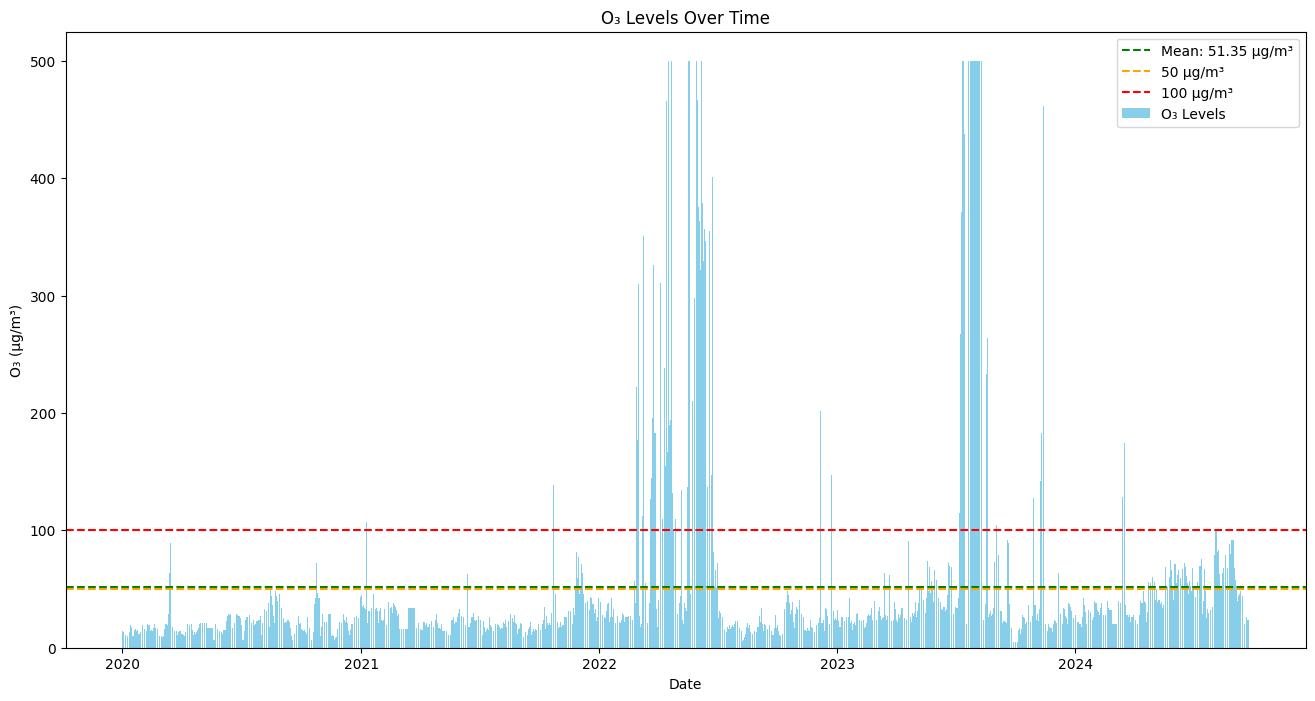

In [55]:
# Parse 'date_time' column
df['date_time'] = pd.to_datetime(df['date_time'], format='%m/%d/%Y')

# Set the date as the index for easier plotting
df.set_index('date_time', inplace=True)

mean_o3 = df['o3'].mean()

# Plotting
plt.figure(figsize=(16, 8))
plt.bar(df.index, df['o3'], color='skyblue', label='O₃ Levels')

plt.axhline(mean_o3, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_o3:.2f} µg/m³')
plt.axhline(50, color='orange', linestyle='--', linewidth=1.5, label='50 µg/m³')
plt.axhline(100, color='red', linestyle='--', linewidth=1.5, label='100 µg/m³')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('O₃ (µg/m³)')
plt.title('O₃ Levels Over Time')
plt.legend()

# Display the plot
plt.show()

### 2.2 MONTH AVERAGE

MEAN O₃: 51.3462620949074 µg/m³


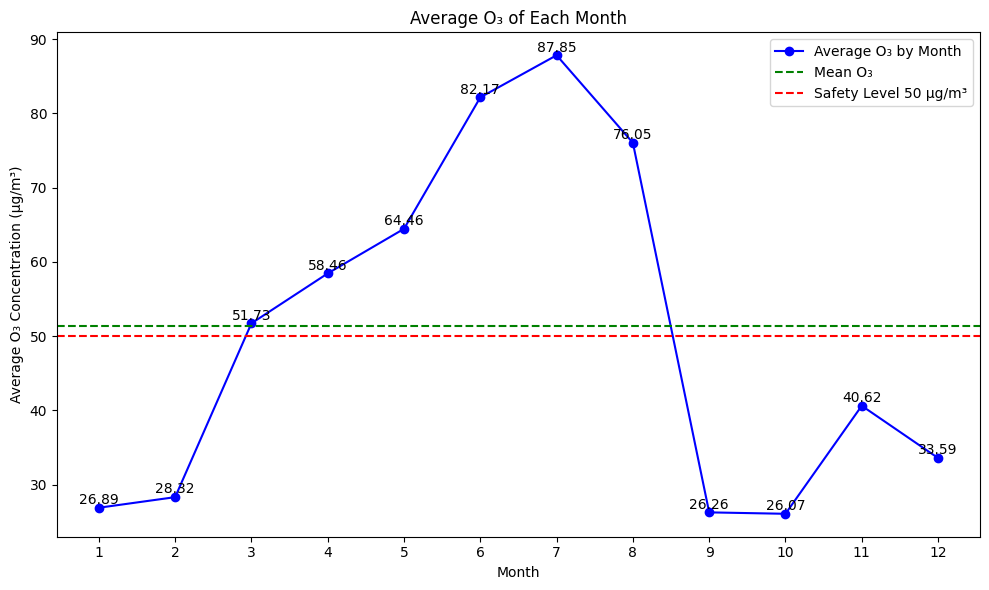

In [56]:
# Group the data by month and calculate the average O₃ index for each month
group_month = df.groupby("month")
months = range(1, 13)
data = [group_month['o3'].mean().loc[month] for month in months]

# Draw a chart
plt.figure(figsize=(10, 6))
plt.plot(months, data, marker="o", color="blue", label="Average O₃ by Month")
plt.title("Average O₃ of Each Month")
plt.xlabel("Month")
plt.ylabel("Average O₃ Concentration (μg/m³)")
plt.xticks(months)

# Displays the average value of O₃ per point
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

# The curve shows the average value of O₃.
plt.axhline(y=df["o3"].mean(), color="green", linestyle="--", label="Mean O₃")
# Safety level curve at 50 µg/m³
plt.axhline(y=50, color="red", linestyle="--", label="Safety Level 50 µg/m³")

print(f"MEAN O₃: {df['o3'].mean()} µg/m³")

plt.legend()
plt.tight_layout()
plt.show()



### 2.3 YEAR

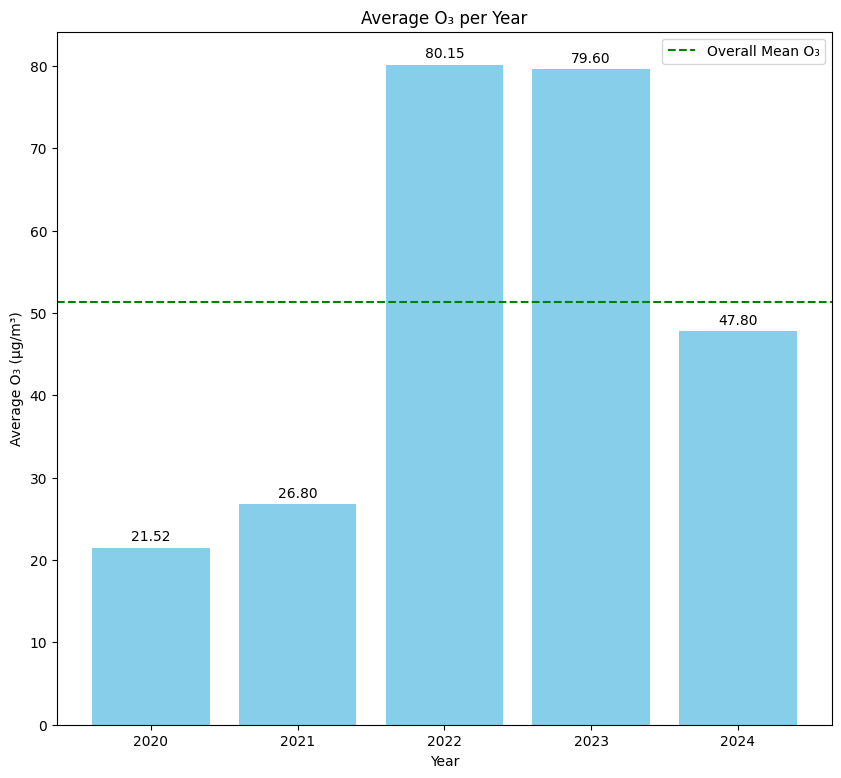

In [57]:
yearly_avg_o3 = df.groupby('year')['o3'].mean()

# Draw bar chart
plt.figure(figsize=(10, 9))
plt.bar(yearly_avg_o3.index, yearly_avg_o3.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average O₃ (μg/m³)')
plt.title('Average O₃ per Year')
plt.axhline(y=df['o3'].mean(), color='green', linestyle='--', label='Overall Mean O₃')
plt.legend()

# Show average value on each column
for i, value in enumerate(yearly_avg_o3.values):
    plt.text(yearly_avg_o3.index[i], value + 0.5, f"{value:.2f}", ha="center", va="bottom")

plt.show()

### 2.4 SEASON

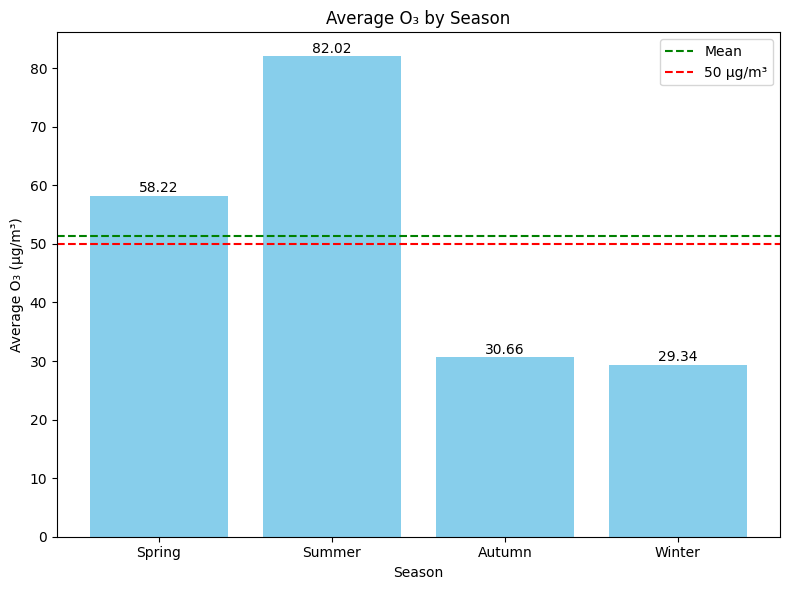

In [68]:
# Average o3 by season

# Assuming the 'date_time' column is already in datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Determine the season based on the month
def get_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

# Add 'season' column to DataFrame
df['season'] = df['date_time'].dt.month.apply(get_season)


group_season = df.groupby('season')['o3'].mean()
seasons = ["Spring", "Summer", "Autumn", "Winter"]
data = [group_season[season] for season in seasons]


# Draw a chart
plt.figure(figsize=(8, 6))
idx = range(len(seasons))
plt.bar(idx, data, color='skyblue')
plt.xticks(idx, seasons)
plt.title("Average O₃ by Season")
plt.xlabel("Season")
plt.ylabel("Average O₃ (μg/m³)")

# Display values on each column
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

# Overall mean curve and safety threshold
plt.axhline(y=df["o3"].mean(), color="green", linestyle="--", label="Mean")
plt.axhline(y=50, color="red", linestyle="--", label="50 μg/m³")
# plt.axhline(y=100, color="orange", linestyle="--", label="100 μg/m³")

plt.legend()
plt.tight_layout()
plt.show()


Observation: 

  ##### 2.4.1 PIE CHART

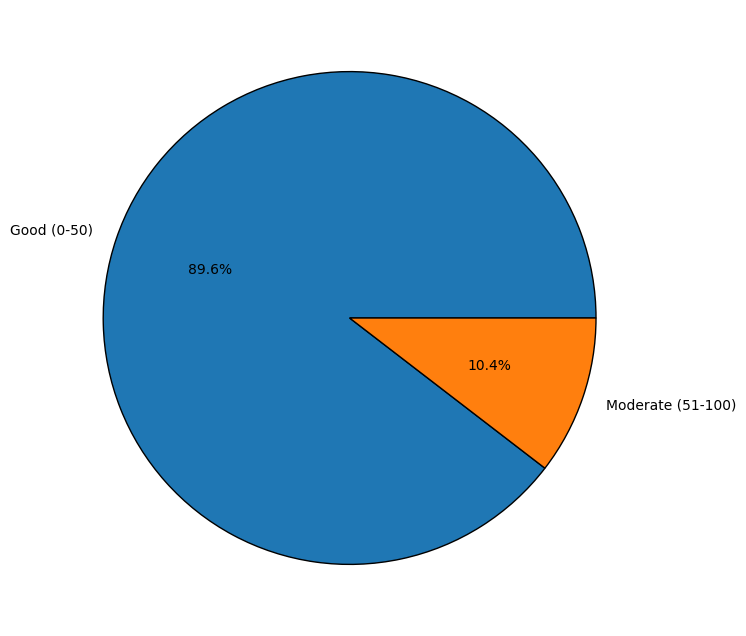

In [69]:
good = len(df.loc[df["o3"] <= 50])
moderate = len(df.loc[(df["o3"] >= 51) & (df["o3"] <= 100)])
interval = [good, moderate]
labels = ["Good (0-50)", "Moderate (51-100)"]
plt.figure(figsize=(8, 8))
explode = [0, 0]
plt.pie(interval, labels=labels, wedgeprops={"edgecolor": "black", "linewidth": 1}, autopct='%1.1f%%', explode=explode)
plt.show()

## 3. WEATHER ANALYSIS

### 3.1 Precipitation

#### 3.1.1 MONTH

Mean O₃ Concentration: 51.35 µg/m³


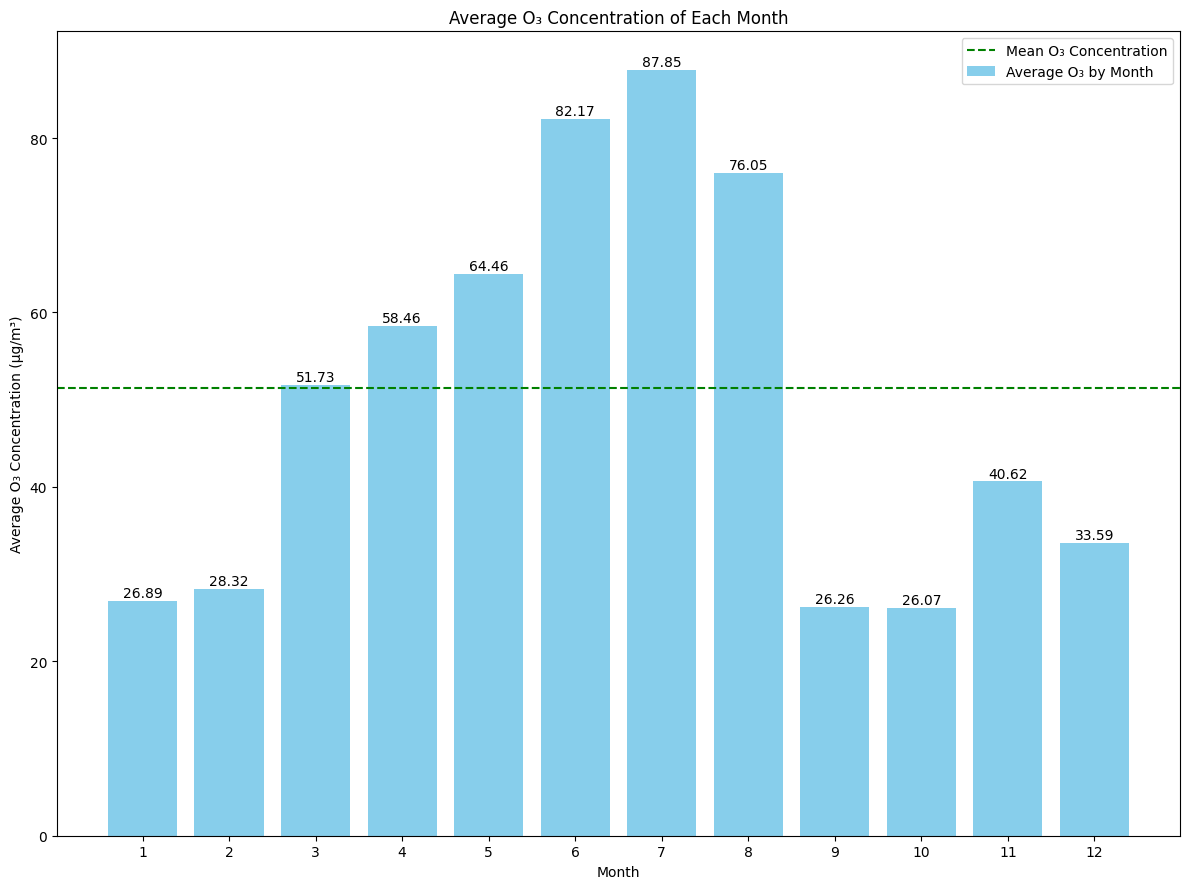

In [75]:
# Convert date_time column to datetime type
df['date_time'] = pd.to_datetime(df['date_time'])


df['month'] = df['date_time'].dt.month

# Group the data by month and calculate the average value of O₃
group_month = df.groupby("month")
months = range(1, 13)
o3_means = [group_month['o3'].mean().loc[month] for month in months]

# Draw a chart
plt.figure(figsize=(12, 9))
plt.bar(months, o3_means, color="skyblue", label="Average O₃ by Month")
plt.title("Average O₃ Concentration of Each Month")
plt.xlabel("Month")
plt.ylabel("Average O₃ Concentration (µg/m³)")
plt.xticks(months)

# Show average value per column
for i, value in enumerate(o3_means):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

# The curve represents the average value of O₃.
plt.axhline(y=df['o3'].mean(), color="green", linestyle="--", label="Mean O₃ Concentration")

# Print the average value of O₃
print(f"Mean O₃ Concentration: {df['o3'].mean():.2f} µg/m³")

plt.legend()
plt.tight_layout()
plt.show()


Observation: Rainfall is unevenly distributed between months of the year. The precipitation reaches highest value in October.

#### 3.1.2 SEASON

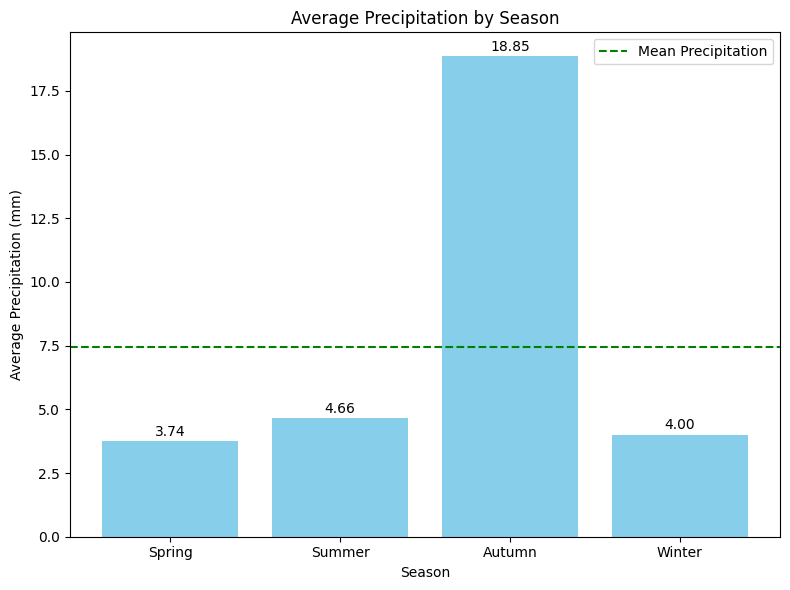

In [76]:
# Average o3 by season
group_season = df.groupby('season')['totalprecip_mm'].mean()
seasons = ["Spring", "Summer", "Autumn", "Winter"]
data = [group_season[season] for season in seasons]

# Draw a chart
plt.figure(figsize=(8, 6))
idx = range(len(seasons))
plt.bar(idx, data, color='skyblue')
plt.xticks(idx, seasons)
plt.title("Average Precipitation by Season")
plt.xlabel("Season")
plt.ylabel("Average Precipitation (mm)")

for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

plt.axhline(y=df["totalprecip_mm"].mean(), color="green", linestyle="--", label="Mean Precipitation")

plt.legend()
plt.tight_layout()
plt.show()


Observation: Rainfall is mainly distributed in Autumn, about 6 times higher than other seasons.

#### 3.1.3 CORRELATION

-0.047261899265033734


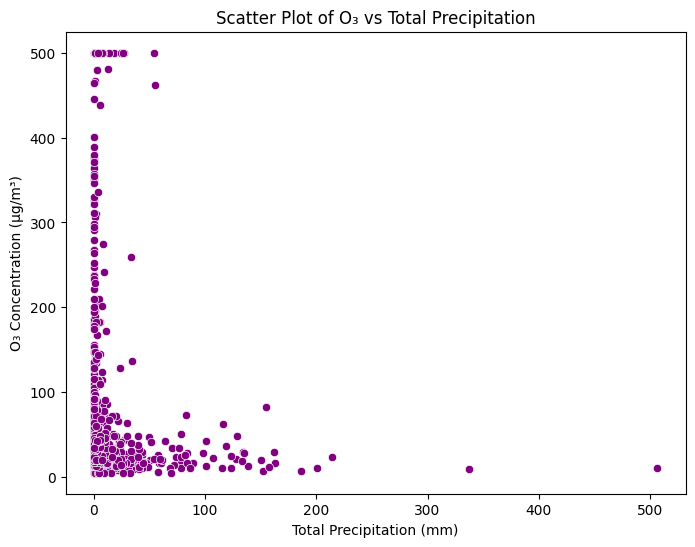

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='totalprecip_mm', y='o3', data=df, color='purple')
plt.title("Scatter Plot of O₃ vs Total Precipitation")
plt.xlabel("Total Precipitation (mm)")
plt.ylabel("O₃ Concentration (μg/m³)")
correlation = df['o3'].corr(df['totalprecip_mm'])
print(correlation)
plt.show()

Observation: The correlation is too low

### 3.2 TEMPERATURE

#### 3.2.1 MONTH

Mean Temperature: 25.03 °C


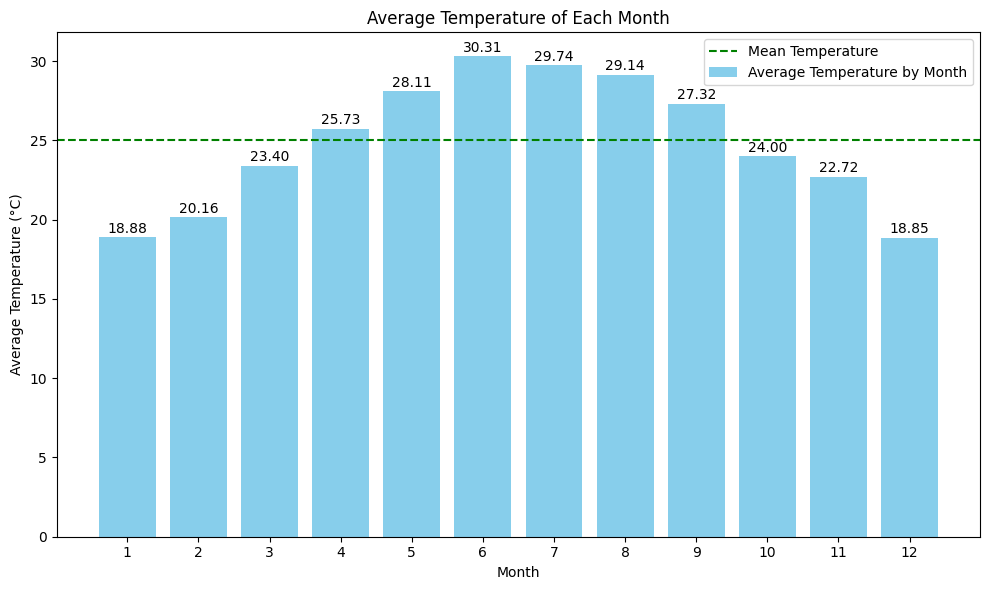

In [78]:
group_month = df.groupby("month")
months = range(1, 13)
data = [group_month['temp_c'].mean().loc[month] for month in months]

plt.figure(figsize=(10, 6))
plt.bar(months, data, color="skyblue", label="Average Temperature by Month")
plt.title("Average Temperature of Each Month")
plt.xlabel("Month")
plt.ylabel("Average Temperature (°C)")
plt.xticks(months)

for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

mean_temp = df["temp_c"].mean()
plt.axhline(y=mean_temp, color="green", linestyle="--", label="Mean Temperature")

print(f"Mean Temperature: {mean_temp:.2f} °C")
plt.legend()
plt.tight_layout()
plt.show()


Observation: Obeying the laws of nature.

#### 3.2.2 SEASON

Mean Temperature: 24.90 °C


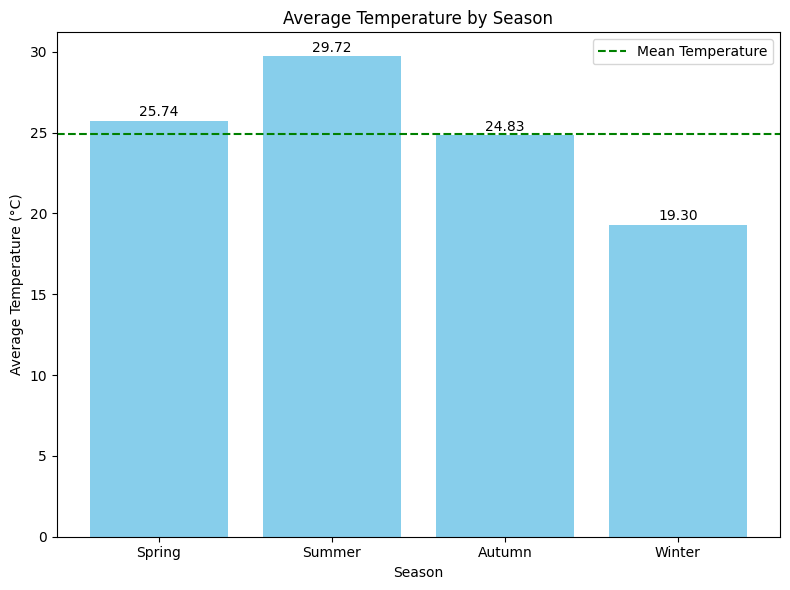

In [79]:
group_season = df.groupby('season')['temp_c'].mean()
seasons = ["Spring", "Summer", "Autumn", "Winter"]
data = [group_season[season] for season in seasons]

# Draw a chart
plt.figure(figsize=(8, 6))
idx = range(len(seasons))
plt.bar(idx, data, color='skyblue')
plt.xticks(idx, seasons)
plt.title("Average Temperature by Season")
plt.xlabel("Season")
plt.ylabel("Average Temperature (°C)")

for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

plt.axhline(y=group_season.mean(), color="green", linestyle="--", label="Mean Temperature")

print(f"Mean Temperature: {group_season.mean():.2f} °C")

plt.legend()
plt.tight_layout()
plt.show()


Observation: The temperature increases from beginning to mid-year, whereas has downward trend in Autumn and Winter

#### 3.2.3 CORRELATION

0.14397167570825203


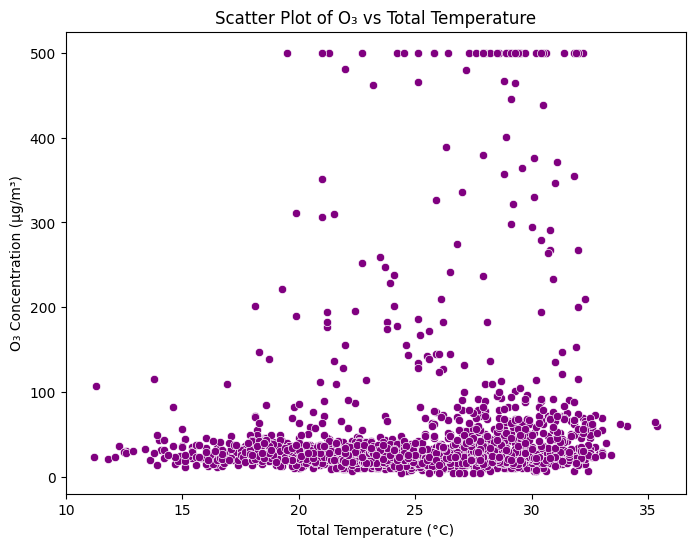

In [80]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp_c', y='o3', data=df, color='purple')
plt.title("Scatter Plot of O₃ vs Total Temperature")
plt.xlabel("Total Temperature (°C)")
plt.ylabel("O₃ Concentration (μg/m³)")
correlation = df['o3'].corr(df['temp_c'])
print(correlation)
plt.show()

Observation: Correlation is extremely low.

### 3.3 WIND'S SPEED

#### 3.3.1 MONTH

Mean Wind's Speed: 9.311166430495145 m/s


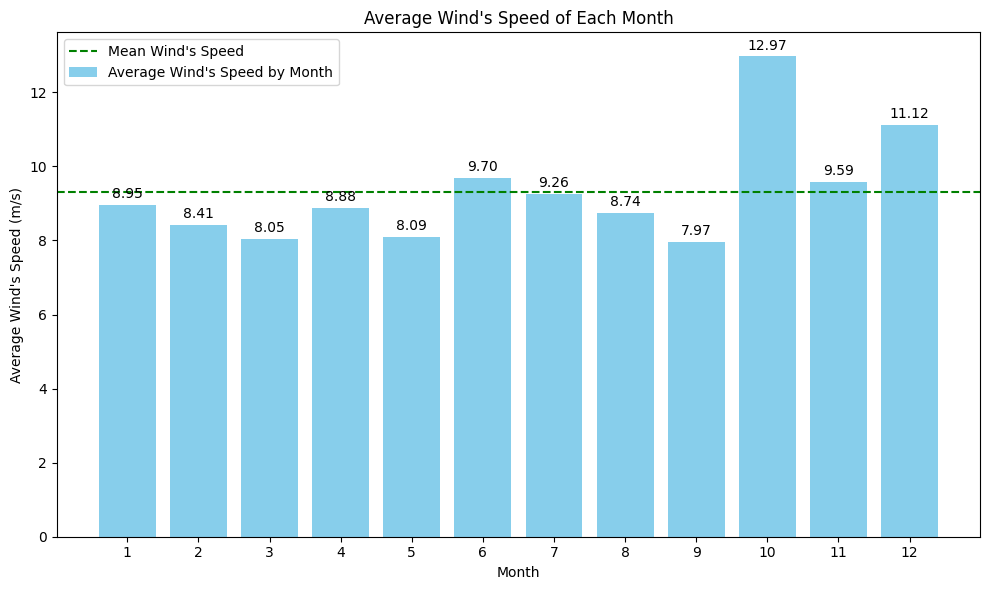

In [81]:
group_month = df.groupby("month")['wind_kph'].mean()
months = range(1, 13)
data = [group_month.loc[month] for month in months]

plt.figure(figsize=(10, 6))
plt.bar(months, data, color="skyblue", label="Average Wind's Speed by Month")
plt.title("Average Wind's Speed of Each Month")
plt.xlabel("Month")
plt.ylabel("Average Wind's Speed (m/s)")
plt.xticks(months)

for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

mean_temp = group_month.mean()
plt.axhline(y=mean_temp, color="green", linestyle="--", label="Mean Wind's Speed")

print(f"Mean Wind's Speed: {mean_temp} m/s")
plt.legend()
plt.tight_layout()
plt.show()


Observation: This chart shows the seasonal variation in wind speed, with winds becoming stronger at the end of the year and more stable in the middle of the year.

#### 3.3.2 SEASON

Mean Wind's Speed: 9.26 m/s


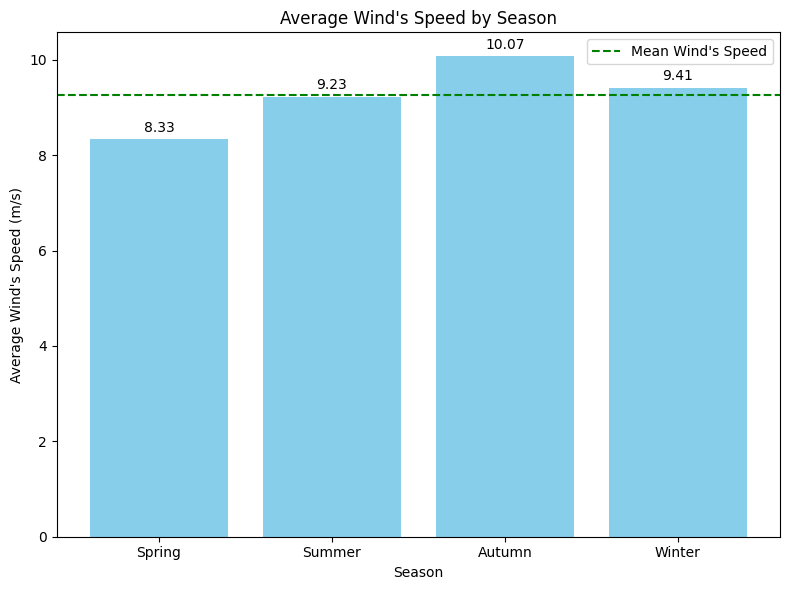

In [82]:
group_season = df.groupby('season')['wind_kph'].mean()
seasons = ["Spring", "Summer", "Autumn", "Winter"]
data = [group_season[season] for season in seasons]

# Draw a chart
plt.figure(figsize=(8, 6))
idx = range(len(seasons))
plt.bar(idx, data, color='skyblue')
plt.xticks(idx, seasons)
plt.title("Average Wind's Speed by Season")
plt.xlabel("Season")
plt.ylabel("Average Wind's Speed (m/s)")

for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

plt.axhline(y=group_season.mean(), color="green", linestyle="--", label="Mean Wind's Speed")

print(f"Mean Wind's Speed: {group_season.mean():.2f} m/s")

plt.legend()
plt.tight_layout()
plt.show()


Observation: Tends to increase from spring to fall, with a slight fall in winter.

#### 3.3.3 CORRECLATION

-0.00019090389566884923


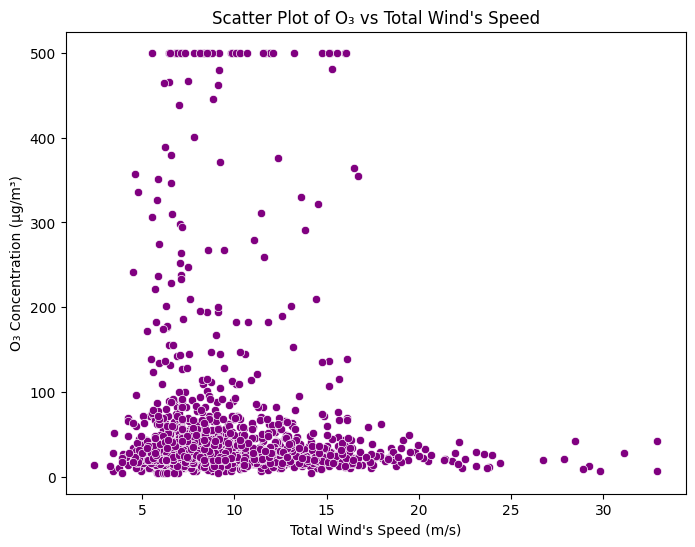

In [83]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='wind_kph', y='o3', data=df, color='purple')
plt.title("Scatter Plot of O₃ vs Total Wind's Speed")
plt.xlabel("Total Wind's Speed (m/s)")
plt.ylabel("O₃ Concentration (μg/m³)")
correlation = df['o3'].corr(df['wind_kph'])
print(correlation)
plt.show()

Observation: The correlation is too low.

### 3.4 HUMIDITY

#### 3.4.1 MONTH

Mean Humidity: 80.30 % 


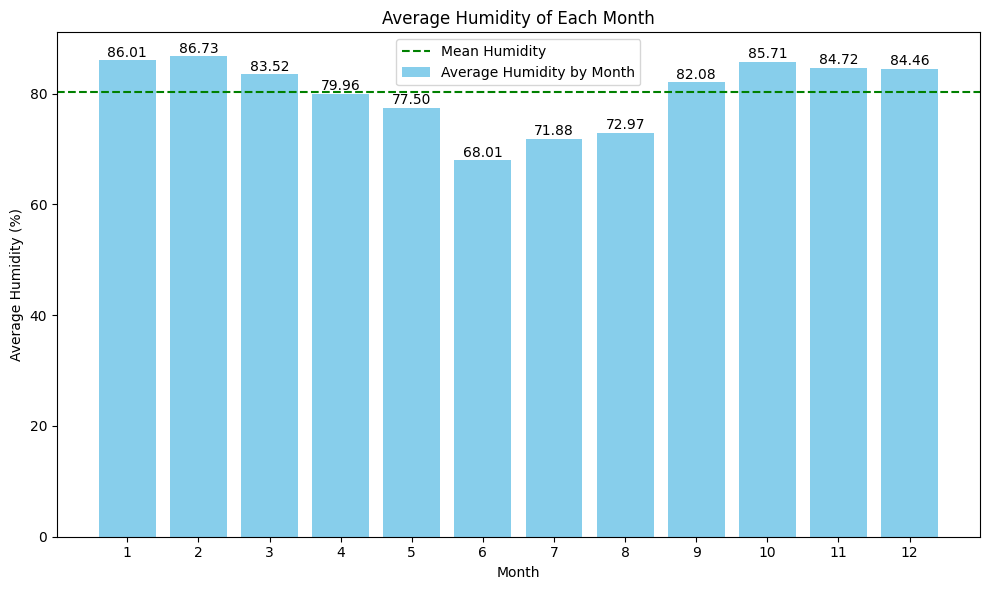

In [84]:
group_month = df.groupby("month")['humidity'].mean()
months = range(1, 13)
data = [group_month.loc[month] for month in months]

plt.figure(figsize=(10, 6))
plt.bar(months, data, color="skyblue", label="Average Humidity by Month")
plt.title("Average Humidity of Each Month")
plt.xlabel("Month")
plt.ylabel("Average Humidity (%)")
plt.xticks(months)

for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

mean_temp = group_month.mean()
plt.axhline(y=mean_temp, color="green", linestyle="--", label="Mean Humidity")

print(f"Mean Humidity: {mean_temp:.2f} % ")
plt.legend()
plt.tight_layout()
plt.show()

Observation: Average humidity tends to remain from September to March of the following year. The remaining months decreased quite clearly.

#### 3.4.2 SEASON

Mean Humidity: 80.29 $


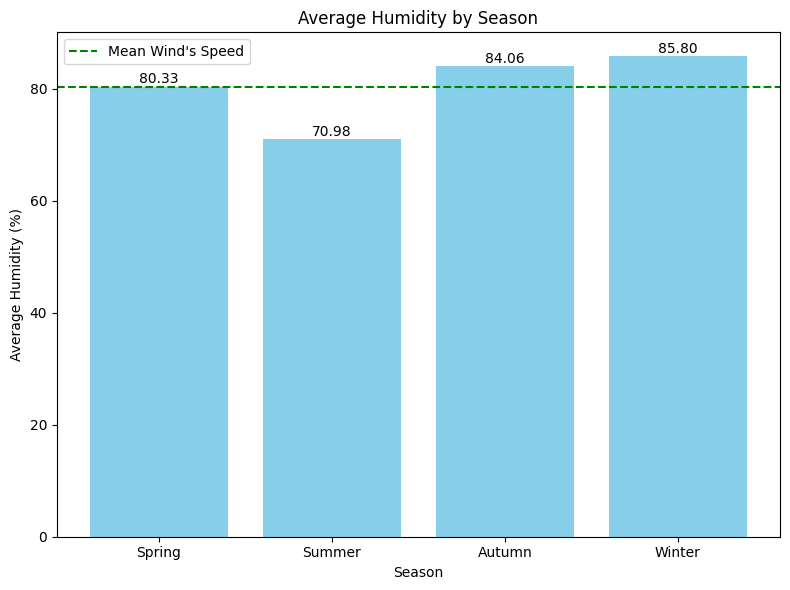

In [85]:
group_season = df.groupby('season')['humidity'].mean()
seasons = ["Spring", "Summer", "Autumn", "Winter"]
data = [group_season[season] for season in seasons]

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
idx = range(len(seasons))
plt.bar(idx, data, color='skyblue')
plt.xticks(idx, seasons)
plt.title("Average Humidity by Season")
plt.xlabel("Season")
plt.ylabel("Average Humidity (%)")

for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

plt.axhline(y=group_season.mean(), color="green", linestyle="--", label="Mean Wind's Speed")

print(f"Mean Humidity: {group_season.mean():.2f} $")

plt.legend()
plt.tight_layout()
plt.show()


Observation: Average humidity of Summer is lowest. The remaining seasons do not differ much.

#### 3.4.3 CORRELATION

-0.14847751587471225


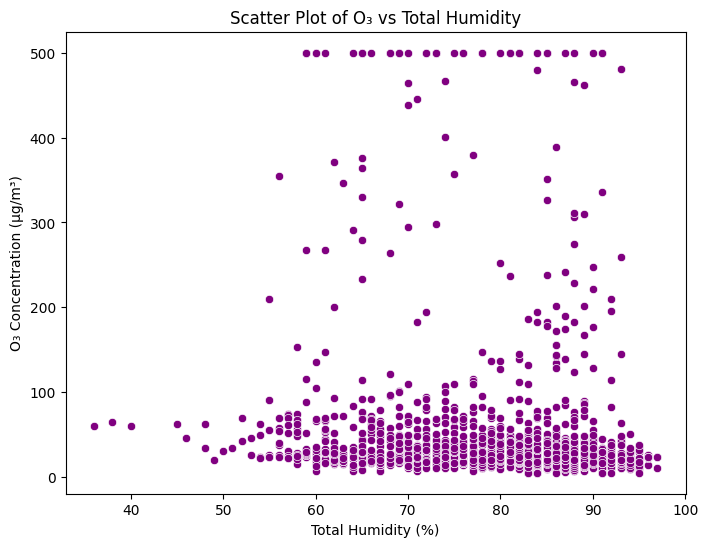

In [86]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='humidity', y='o3', data=df, color='purple')
plt.title("Scatter Plot of O₃ vs Total Humidity")
plt.xlabel("Total Humidity (%)")
plt.ylabel("O₃ Concentration (μg/m³)")
correlation = df['o3'].corr(df['humidity'])
print(correlation)
plt.show()

Observation: The average of O₃ which is in range 10 to 40 is highly distributed at humidity levels ranging from 70% to over 90%.

## INSIGHT

### 
- O₃ Distribution Across Zones: The distribution shows that the O₃ concentration in the "Good" air quality zone (0–50 µg/m³) is significantly more common than in higher concentration zones. This suggests that the majority of recorded O₃ levels remain within acceptable air quality standards.

- Seasonal Variation:
1. Winter and Autumn: O₃ levels predominantly fall within low concentrations (0–50 µg/m³), indicating generally favorable air quality.
  
2. Spring and Summer: There is an increase in O₃ concentration, with higher density observed in levels above 50 µg/m³, particularly during summer. This seasonal trend suggests that O₃ pollution tends to rise during warmer months.
